# Chicago Active Employee Dataset Analysis

This notebook provides a comprehensive analysis of the Chicago Active Employee dataset, including:

1. **Data Loading & Preprocessing**: Loading and cleaning the employee data
2. **Gender Detection**: Enhanced gender classification using name lists
3. **Exploratory Data Analysis**: Statistical summaries and visualizations
4. **Feature Engineering**: Creating derived features for analysis
5. **Clustering Analysis**: K-means clustering to identify employee groups
6. **Classification Models**: Logistic regression for gender and salary prediction

## 📚 Learning Objectives

By the end of this notebook, students will understand:

1. **Data Science Workflow**: Complete pipeline from raw data to insights
2. **Data Preprocessing**: Cleaning, transforming, and preparing real-world data
3. **Feature Engineering**: Creating meaningful variables from raw data
4. **Exploratory Data Analysis**: Discovering patterns through visualization
5. **Unsupervised Learning**: K-means clustering for data segmentation
6. **Supervised Learning**: Classification models for prediction
7. **Model Evaluation**: Assessing model performance with appropriate metrics

---

## 🎯 What We'll Analyze

We're working with **Chicago's Active Employee dataset** - a real dataset containing information about ~31,000 city employees including:
- Employee names and demographics
- Job titles and departments
- Salary information (annual/hourly)
- Employment status (full-time/part-time)

**Our Goals:**
1. Clean and explore the data to understand Chicago's workforce
2. Use advanced techniques to infer employee gender from names
3. Segment employees into meaningful groups using clustering
4. Build predictive models to classify employees

---

## 🔧 Step 1: Environment Setup

**What we're doing:** Installing the Python libraries we need for our analysis.

**Key Libraries:**
- **pandas**: Data manipulation and analysis (think Excel but more powerful)
- **numpy**: Numerical computing and mathematical operations
- **matplotlib & seaborn**: Creating beautiful visualizations and charts
- **scikit-learn**: Machine learning algorithms and tools
- **openpyxl**: Reading Excel files (.xlsx format)
- **gender-guesser**: Specialized library for inferring gender from names

**Why this matters:** In real data science projects, you often need specialized libraries. Always install what you need first!

## 📁 Step 2: Configuration and File Paths

**What we're doing:** Setting up the file paths for our data sources.

**Important concepts:**
- **FILE_PATH**: Points to the main Chicago employee dataset (Excel format)
- **MALE_FILE, FEMALE_FILE, NEUTRAL_FILE**: Text files containing lists of names categorized by gender
- **OUTPUT_FILE**: Where we'll save our cleaned dataset

**Why we use URLs:** The data is stored on GitHub, so we can access it directly without downloading files manually. This makes our analysis reproducible - anyone can run this notebook and get the same results!

**Best Practice:** Always define your file paths at the top of your notebook for easy maintenance.

In [1]:
# Install required packages
!pip install pandas openpyxl gender-guesser matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 7.3 MB/s eta 0:00:00


In [2]:
# Configuration
FILE_PATH = 'https://raw.githubusercontent.com/nluninja/chicago-active-employee-project/refs/heads/main/data/City%20of%20Chicago%20Active%20Employees%20Dataset.xlsx'
MALE_FILE = "https://raw.githubusercontent.com/nluninja/chicago-active-employee-project/refs/heads/main/data/M.txt"
FEMALE_FILE = "https://raw.githubusercontent.com/nluninja/chicago-active-employee-project/refs/heads/main/data/F.txt"
NEUTRAL_FILE = "https://raw.githubusercontent.com/nluninja/chicago-active-employee-project/refs/heads/main/data/N.txt"
OUTPUT_FILE = "data/chicago_dataset_cleaned.csv"

## 📚 Step 3: Import Libraries

**What we're doing:** Loading all the Python libraries we'll use throughout our analysis.

**Library Categories:**
1. **Data Manipulation**: `pandas`, `numpy` - the foundation of data science
2. **Visualization**: `matplotlib`, `seaborn` - creating charts and graphs
3. **Text Processing**: `re` (regular expressions) - cleaning text data
4. **Web Requests**: `requests` - downloading data from URLs
5. **Machine Learning**: `sklearn` modules - algorithms and evaluation tools
6. **Gender Detection**: `gender_guesser` - specialized for name-based gender inference

**Configuration Settings:**
- `warnings.filterwarnings('ignore')`: Hides warning messages for cleaner output
- `sns.set_style('whitegrid')`: Sets a clean visual style for our plots
- `plt.rcParams['figure.figsize']`: Sets default figure size for all plots

**Student Tip:** Import everything you need at the beginning. It's good practice and helps others understand your dependencies!

In [3]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
import warnings

# Machine learning imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           silhouette_score, roc_curve, auc, roc_auc_score)

# Gender detection library
import gender_guesser.detector as gender

# Configure warnings and plotting style
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 🔍 Step 4: Load and Inspect the Dataset

**What we're doing:** Loading the Chicago employee data and getting our first look at it.

**Key Concepts:**
- **pd.read_excel()**: Pandas function to read Excel files
- **Error handling**: Using try/except to handle potential file loading errors
- **Shape**: Shows (rows, columns) - tells us dataset size
- **Data types**: Understanding what kind of information each column contains

**What to look for:**
- How many employees are in the dataset?
- What columns (features) do we have?
- Are there any obvious data quality issues?

**Real-world tip:** Always inspect your data first! Understanding your dataset is crucial before any analysis.

In [4]:
# Load the dataset
try:
    df = pd.read_excel(FILE_PATH)
    print(f"Dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("Dataset file not found. Please download it and place it in the correct path.")
    print("You can often find it by searching 'Current Employee Names, Salaries, and Position Titles Chicago'.")
    exit()

Dataset loaded successfully. Shape: (30859, 8)


## 🔎 Step 5: Exploratory Data Analysis (Initial)

**What we're doing:** Getting a comprehensive understanding of our dataset structure and quality.

**Analysis Components:**
1. **df.info()**: Shows data types, memory usage, and non-null counts
2. **df.head()**: Displays first 5 rows to see actual data format
3. **df.isnull().sum()**: Counts missing values in each column
4. **Shape and columns**: Basic dataset dimensions

**Key Observations to Make:**
- **Missing Data**: Which columns have missing values? How much is missing?
- **Data Types**: Are salaries stored as numbers or text?
- **Data Format**: How are names formatted? (Last, First format)
- **Inconsistencies**: Any obvious data quality issues?

**Student Exercise:** Try to spot patterns in the missing data. Why might 'Typical Hours' be missing for some employees but not others?

In [5]:
# Initial data exploration
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n=== Data Info ===")
print(df.info())
print("\n=== Missing Values ===")
print(df.isnull().sum())
print("\n=== First 5 rows ===")
print(df.head())

=== Dataset Overview ===
Shape: (30859, 8)
Columns: ['Name', 'Job Titles', 'Department', 'Full or Part-Time', 'Salary or Hourly', 'Typical Hours', 'Annual Salary', 'Hourly Rate']

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30859 entries, 0 to 30858
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               30859 non-null  object 
 1   Job Titles         30859 non-null  object 
 2   Department         30859 non-null  object 
 3   Full or Part-Time  30857 non-null  object 
 4   Salary or Hourly   30859 non-null  object 
 5   Typical Hours      6634 non-null   float64
 6   Annual Salary      24225 non-null  float64
 7   Hourly Rate        6634 non-null   float64
dtypes: float64(3), object(5)
memory usage: 1.9+ MB
None

=== Missing Values ===
Name                     0
Job Titles               0
Department               0
Full or Part-Time        2
Salary or Hourly         

## 🛠️ Step 6: Data Preprocessing Functions

**What we're doing:** Creating reusable functions to clean and transform our data.

**Why Functions Matter:** Instead of writing the same code multiple times, we create functions that can be reused. This makes our code:
- **Cleaner**: Easier to read and understand
- **Maintainable**: Changes in one place affect everywhere
- **Testable**: We can test functions independently

**Our Functions:**

1. **normalize_column_names()**:
   - Converts "Job Titles" → "job_titles"
   - Removes special characters and spaces
   - Makes column names consistent for programming

2. **load_gender_name_lists()**:
   - Downloads lists of male, female, and neutral names from URLs
   - Handles errors gracefully if downloads fail
   - Returns organized sets of names for quick lookup

3. **classify_gender_from_name()**:
   - Takes a first name and determines likely gender
   - Uses the name lists we downloaded
   - Returns M/F/N/U (Male/Female/Neutral/Unknown)

4. **process_employee_data()**:
   - The "master function" that orchestrates all our data cleaning
   - Splits full names into first/last names
   - Calculates annual salaries for hourly workers
   - Applies all our transformations in the right order

**Learning Point:** Good data science involves lots of data cleaning. Functions help us organize this work efficiently!

In [6]:
def normalize_column_names(df):
    """Normalize column names to lowercase with underscores."""
    def normalize_single_name(col_name):
        name = str(col_name).lower().strip()
        name = re.sub(r'[\s-]+', '_', name)
        name = re.sub(r'[^a-z0-9_]+', '', name)
        name = re.sub(r'_+', '_', name)
        return name

    df.columns = [normalize_single_name(col) for col in df.columns]
    return df

def load_gender_name_lists(male_file, female_file, neutral_file):
    """Load gender name lists from remote files."""
    def load_names_from_url(url):
        try:
            response = requests.get(url)
            response.raise_for_status()
            return set(line.strip().lower() for line in response.text.splitlines())
        except requests.exceptions.RequestException as e:
            print(f"Error loading names from {url}: {e}")
            return set()

    male_names = load_names_from_url(male_file)
    female_names = load_names_from_url(female_file)
    neutral_names = load_names_from_url(neutral_file)

    return male_names, female_names, neutral_names

def classify_gender_from_name(first_name, male_names, female_names, neutral_names):
    """Classify gender based on first name and name lists."""
    if pd.isna(first_name) or not str(first_name).strip():
        return "U"

    name_clean = str(first_name).strip().split()[0].lower()
    if not name_clean:
        return "U"

    if name_clean in male_names:
        return "M"
    elif name_clean in female_names:
        return "F"
    elif name_clean in neutral_names:
        return "N"
    else:
        return "U"

def process_employee_data(df, male_names, female_names, neutral_names):
    """Process employee data: extract names, classify gender, normalize columns."""
    # Normalize column names
    df = normalize_column_names(df)

    # Handle Name column
    df['name'] = df['name'].fillna('').astype(str)

    # Extract surname and first name
    name_parts = df['name'].str.split(',', n=1, expand=True)
    df['surname'] = name_parts[0].str.strip()

    first_name_series = name_parts.get(1, pd.Series(index=df.index, dtype=str)).fillna('').str.strip()
    df['first_name'] = first_name_series.str.split(' ', n=1, expand=True)[0].str.strip()
    df['first_name'] = df['first_name'].replace('', pd.NA)

    # Classify gender
    df['sex'] = df['first_name'].apply(
        lambda x: classify_gender_from_name(x, male_names, female_names, neutral_names)
    )

    # Calculate annual salary for hourly workers
    mask_hourly = (df['salary_or_hourly'] == 'HOURLY')
    calculated_values = df.loc[mask_hourly, 'hourly_rate'] * df.loc[mask_hourly, 'typical_hours'] * 52
    df.loc[mask_hourly, 'annual_salary'] = calculated_values

    # Remove rows with missing employment type
    df = df.dropna(subset=['full_or_part_time'])

    return df

## ⚡ Step 7: Execute Data Processing

**What we're doing:** Running our preprocessing functions to transform the raw data.

**Process Steps:**
1. **Load Gender Name Lists**:
   - Downloads ~100,000 names categorized by gender
   - These lists help us infer gender from employee first names
   - Uses crowd-sourced data for better accuracy than simple algorithms

2. **Process Employee Data**:
   - Applies all our cleaning functions in sequence
   - Transforms messy real-world data into analysis-ready format
   - Creates new columns (surname, first_name, sex)

**Key Transformation - Salary Calculation:**
- **Problem**: Some employees are paid hourly, others annually
- **Solution**: Convert hourly workers to annual equivalent
- **Formula**: `hourly_rate × typical_hours × 52 weeks = annual_salary`
- **Why**: This lets us compare all employees on equal footing

**Results to Expect:**
- Original: 30,859 employees with 8 columns
- Processed: ~30,857 employees with 11 columns (added surname, first_name, sex)
- Some rows dropped due to missing employment type data

**Real-world insight:** Data processing often reduces your dataset slightly as you clean out unusable records. This is normal and necessary!

In [7]:
# Load gender name lists and process data
print("Loading gender name lists...")
male_names, female_names, neutral_names = load_gender_name_lists(MALE_FILE, FEMALE_FILE, NEUTRAL_FILE)
print(f"Loaded {len(male_names)} male, {len(female_names)} female, and {len(neutral_names)} neutral names.")

print("\nProcessing employee data...")
df = process_employee_data(df, male_names, female_names, neutral_names)
print(f"Processed data shape: {df.shape}")

# Display processed data sample
print("\n=== Processed Data Sample ===")
print(df[['name', 'surname', 'first_name', 'sex', 'annual_salary', 'department']].head())

Loading gender name lists...
Loaded 37757 male, 64121 female, and 2941 neutral names.

Processing employee data...
Processed data shape: (30857, 11)

=== Processed Data Sample ===
                  name    surname first_name sex  annual_salary  \
0  CABALLERO, SAMUEL A  CABALLERO     SAMUEL   M        86132.8   
1     CHAPMAN, BRYAN A    CHAPMAN      BRYAN   M        80448.0   
2    MUNOZ, LISSETTE C      MUNOZ   LISSETTE   F        97974.0   
3    ALDERDEN, JACOB M   ALDERDEN      JACOB   M       159552.0   
4   JOHNSON, ANTHONY L    JOHNSON    ANTHONY   M        81640.0   

                    department  
0  DEPT STREETS AND SANITATION  
1              FIRE DEPARTMENT  
2         DEPARTMENT OF POLICE  
3         DEPARTMENT OF POLICE  
4     DEPT OF WATER MANAGEMENT  


## 📊 Step 8: Exploratory Data Analysis - Demographics

**What we're doing:** Creating visualizations to understand the composition of Chicago's workforce.

**Visualization Techniques:**
1. **Pie Charts**: Perfect for showing proportions and percentages
2. **Multiple Subplots**: Comparing different aspects side-by-side

**Analysis Questions We're Answering:**
- **Gender Balance**: What's the gender distribution in city employment?
- **Employment Types**: How many employees work full-time vs part-time?
- **Data Quality**: How well did our gender detection work?

**Key Skills Demonstrated:**
- **matplotlib subplots**: Creating multiple charts in one figure
- **Color palettes**: Using professional color schemes (viridis, pastel)
- **Data aggregation**: Using `.value_counts()` to summarize categorical data

**What to Look For:**
- Is there gender balance in city employment?
- Are most employees full-time or part-time?
- How many names couldn't be classified for gender?

**Student Challenge:** Can you hypothesize why certain genders might be over/under-represented in city employment?

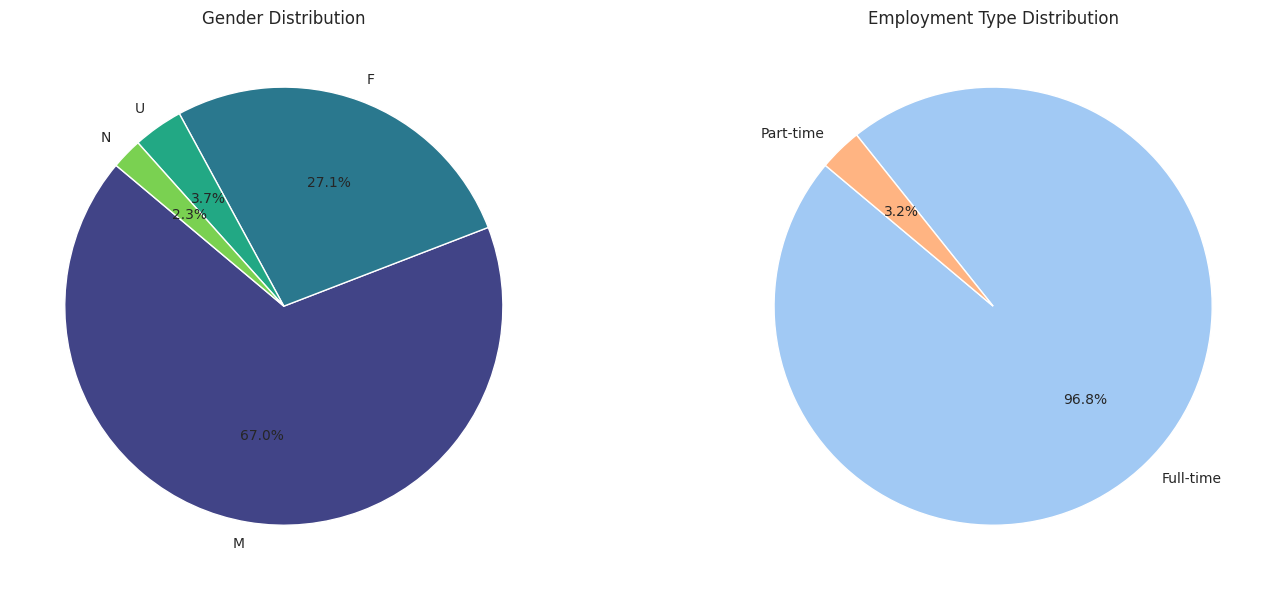

=== Gender Distribution ===
sex
M    20663
F     8351
U     1138
N      705
Name: count, dtype: int64

=== Employment Type Distribution ===
full_or_part_time
F    29878
P      979
Name: count, dtype: int64


In [8]:
# Gender Distribution Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gender distribution pie chart
gender_counts = df['sex'].value_counts()
axes[0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
           startangle=140, colors=sns.color_palette('viridis', len(gender_counts)))
axes[0].set_title('Gender Distribution')

# Employment type distribution
employment_counts = df['full_or_part_time'].value_counts()
axes[1].pie(employment_counts.values, labels=['Full-time', 'Part-time'], autopct='%1.1f%%',
           startangle=140, colors=sns.color_palette('pastel', len(employment_counts)))
axes[1].set_title('Employment Type Distribution')

plt.tight_layout()
plt.show()

print("=== Gender Distribution ===")
print(df['sex'].value_counts())
print("\n=== Employment Type Distribution ===")
print(df['full_or_part_time'].value_counts())

## 💰 Step 9: Salary Analysis - Understanding Compensation

**What we're doing:** Deep dive into salary patterns and compensation across the city workforce.

**Complex Visualization Layout:**
- **2x2 subplot grid**: Four different perspectives on salary data
- Each chart answers a specific question about compensation

**Chart Breakdown:**

1. **Top-Left - Salary Distribution (Histogram)**:
   - Shows how salaries are spread across all employees
   - Look for: Normal distribution? Skewness? Multiple peaks?

2. **Top-Right - Salary by Employment Type (Box Plot)**:
   - Compares full-time vs part-time compensation
   - Box plots show: median, quartiles, outliers

3. **Bottom-Left - Department Size (Bar Chart)**:
   - Which departments employ the most people?
   - Horizontal bars make long department names readable

4. **Bottom-Right - Salary by Top Departments (Box Plot)**:
   - Do different departments pay differently?
   - Compares compensation across major city departments

**Statistical Concepts:**
- **Distribution shape**: Normal, skewed, bimodal?
- **Central tendency**: Mean, median as measures of typical salary
- **Variability**: Range, interquartile range showing salary spread
- **Outliers**: Unusually high or low salaries

**Questions to Consider:**
- Which departments pay the most/least?
- Are there salary outliers (very high/low earners)?
- How much variation exists within departments?

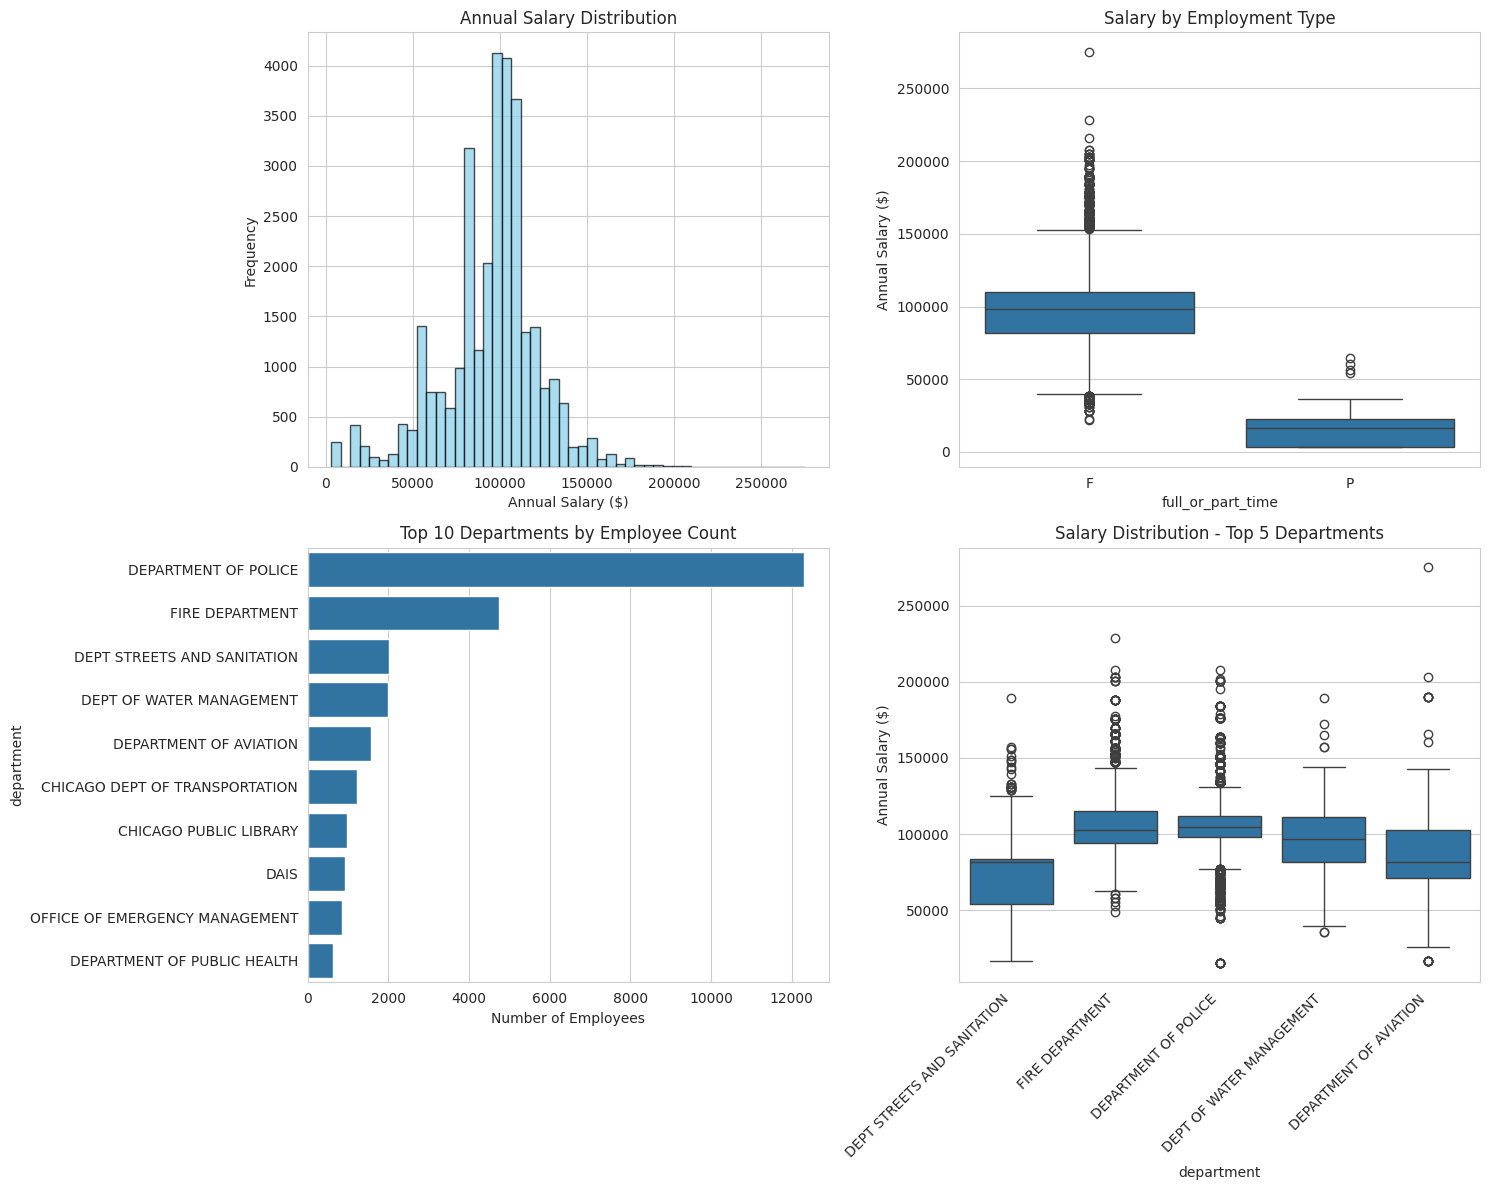

=== Salary Statistics ===
count     30857.000000
mean      94993.610346
std       27577.976209
min        3276.000000
25%       81640.000000
50%       97974.000000
75%      110160.000000
max      275004.000000
Name: annual_salary, dtype: float64


In [9]:
# Salary Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Salary distribution histogram
axes[0,0].hist(df['annual_salary'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Annual Salary Distribution')
axes[0,0].set_xlabel('Annual Salary ($)')
axes[0,0].set_ylabel('Frequency')

# Salary by employment type
sns.boxplot(data=df, x='full_or_part_time', y='annual_salary', ax=axes[0,1])
axes[0,1].set_title('Salary by Employment Type')
axes[0,1].set_ylabel('Annual Salary ($)')

# Top 10 departments by employee count
top_depts = df['department'].value_counts().head(10)
sns.barplot(y=top_depts.index, x=top_depts.values, ax=axes[1,0])
axes[1,0].set_title('Top 10 Departments by Employee Count')
axes[1,0].set_xlabel('Number of Employees')

# Salary by top 5 departments
top_5_depts = df['department'].value_counts().head(5).index
df_top5 = df[df['department'].isin(top_5_depts)]
sns.boxplot(data=df_top5, x='department', y='annual_salary', ax=axes[1,1])
axes[1,1].set_title('Salary Distribution - Top 5 Departments')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45, ha='right')
axes[1,1].set_ylabel('Annual Salary ($)')

plt.tight_layout()
plt.show()

# Summary statistics
print("=== Salary Statistics ===")
print(df['annual_salary'].describe())

## 🔧 Step 10: Feature Engineering for Machine Learning

**What we're doing:** Preparing our data for machine learning algorithms.

**Key Concept - Feature Engineering:**
Feature engineering is the process of selecting, modifying, or creating variables (features) that machine learning algorithms can use effectively.

**Our Feature Engineering Steps:**

1. **Gender Encoding**:
   - **Problem**: ML algorithms need numbers, not text
   - **Solution**: Convert M/F/N/U to 0/1/2/3
   - **Technique**: Label encoding using dictionary mapping

2. **Feature Selection for Clustering**:
   - **Chosen features**: Annual salary + Gender (encoded)
   - **Why these?**: Represent two different aspects of employees (compensation + demographics)

3. **Data Preprocessing Pipeline**:
   - **Missing Value Imputation**: Replace missing values with mean
   - **Standardization**: Scale features to similar ranges
   - **Why standardize?**: K-means clustering is sensitive to feature scales

**Machine Learning Preparation Concepts:**
- **Feature scaling**: Ensuring all features contribute equally
- **Missing value handling**: Algorithms can't handle NaN values
- **Data type consistency**: All features must be numeric for most ML algorithms

**Expected Output:**
- 30,857 employees × 2 features (salary, gender_encoded)
- All values numeric and properly scaled
- No missing values

In [10]:
# Feature Engineering for Clustering
# Encode gender for numerical analysis
sex_mapping = {'M': 0, 'F': 1, 'N': 2, 'U': 3}
df['sex_encoded'] = df['sex'].map(sex_mapping)

# Prepare clustering features
features_for_clustering = ['annual_salary', 'sex_encoded']
X_cluster = df[features_for_clustering].copy()

# Handle missing values and scale features
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_cluster_imputed = imputer.fit_transform(X_cluster)

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster_imputed)

print("=== Clustering Features Prepared ===")
print(f"Features: {features_for_clustering}")
print(f"Data shape after preprocessing: {X_cluster_scaled.shape}")
print("\n=== Gender Encoding ===")
print(df['sex_encoded'].value_counts().sort_index())

=== Clustering Features Prepared ===
Features: ['annual_salary', 'sex_encoded']
Data shape after preprocessing: (30857, 2)

=== Gender Encoding ===
sex_encoded
0    20663
1     8351
2      705
3     1138
Name: count, dtype: int64


## 🎯 Step 11: K-Means Clustering - Finding Optimal Groups

**What we're doing:** Using unsupervised learning to discover natural groupings in our employee data.

**Unsupervised Learning Concept:**
Unlike supervised learning (where we have a target to predict), clustering finds hidden patterns in data without knowing the "right answer" beforehand.

**K-Means Algorithm Basics:**
1. Choose number of clusters (K)
2. Randomly place K cluster centers
3. Assign each data point to nearest center
4. Move centers to average of assigned points
5. Repeat steps 3-4 until centers stop moving

**The K Selection Problem:**
- **Challenge**: How many clusters should we use?
- **Solution**: Try different K values and measure quality

**Our Evaluation Methods:**

1. **Elbow Method**:
   - **Metric**: Inertia (sum of distances from points to cluster centers)
   - **Goal**: Find the "elbow" where improvement slows down
   - **Interpretation**: Sharp drops = good K values

2. **Silhouette Score**:
   - **Metric**: How well-separated are the clusters?
   - **Range**: -1 to 1 (higher is better)
   - **Interpretation**: Measures both separation and cohesion

**Advanced Function Design:**
Our `perform_kmeans_analysis()` function demonstrates professional data science practices:
- Try multiple K values systematically
- Calculate multiple evaluation metrics
- Create clear visualizations
- Return optimal result automatically

**Learning Outcome:** You'll see which K value creates the most meaningful employee segments!

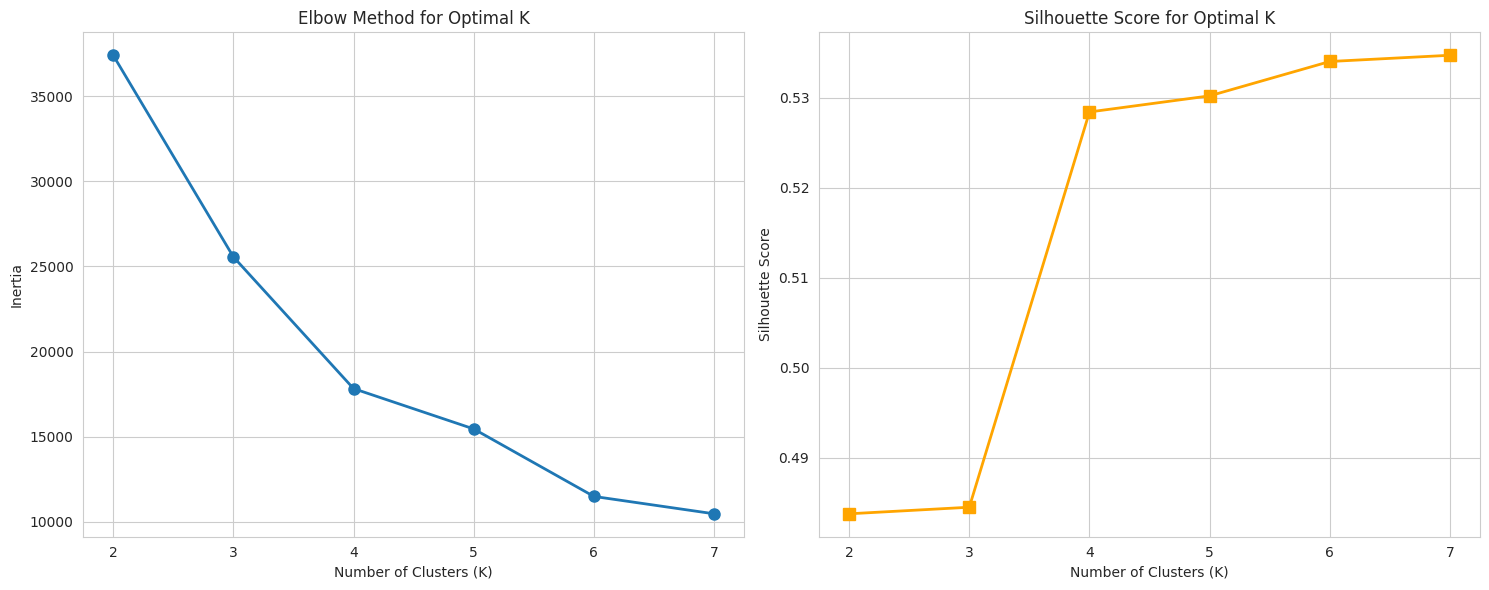

\n=== Optimal K Selection ===
Recommended K based on highest silhouette score: 7
Silhouette score for K=7: 0.5347


In [11]:
# K-Means Clustering Analysis
def perform_kmeans_analysis(X_scaled, k_range=range(2, 8)):
    """Perform K-means clustering with optimal K selection."""
    inertias = []
    silhouette_scores = []

    # Calculate inertia and silhouette scores for different K values
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_scaled)
        inertias.append(kmeans.inertia_)
        sil_score = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(sil_score)

    # Plot results
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Elbow method
    axes[0].plot(k_range, inertias, marker='o', linewidth=2, markersize=8)
    axes[0].set_title('Elbow Method for Optimal K')
    axes[0].set_xlabel('Number of Clusters (K)')
    axes[0].set_ylabel('Inertia')
    axes[0].grid(True)

    # Silhouette scores
    axes[1].plot(k_range, silhouette_scores, marker='s', color='orange', linewidth=2, markersize=8)
    axes[1].set_title('Silhouette Score for Optimal K')
    axes[1].set_xlabel('Number of Clusters (K)')
    axes[1].set_ylabel('Silhouette Score')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

    # Find optimal K (highest silhouette score)
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"\\n=== Optimal K Selection ===")
    print(f"Recommended K based on highest silhouette score: {optimal_k}")
    print(f"Silhouette score for K={optimal_k}: {max(silhouette_scores):.4f}")

    return optimal_k

# Perform clustering analysis
optimal_k = perform_kmeans_analysis(X_cluster_scaled)

## 📈 Step 12: Apply Clustering and Visualize Results

**What we're doing:** Implementing the optimal clustering solution and interpreting the results.

**Clustering Implementation:**
1. **Use Optimal K**: Apply the best K value we found from the previous analysis
2. **Assign Clusters**: Each employee gets a cluster label (0, 1, 2, etc.)
3. **Analyze Characteristics**: What makes each cluster unique?

**Interpretation Techniques:**

1. **Cluster Summary Statistics**:
   - **Mean values**: Average salary and gender encoding per cluster
   - **Cluster sizes**: How many employees in each group?
   - **Pattern recognition**: What story do these numbers tell?

2. **Scatter Plot Visualization**:
   - **X-axis**: Annual salary (economic dimension)
   - **Y-axis**: Gender encoded (demographic dimension)  
   - **Colors**: Different clusters shown in different colors
   - **Insights**: Visual patterns reveal employee segments

**Real-World Applications:**
- **HR Planning**: Understanding workforce composition
- **Budget Analysis**: Salary distribution across groups
- **Policy Making**: Targeted programs for different employee segments

**Expected Insights:**
- Do clusters separate by salary levels?
- Are there gender-based patterns?
- Do we see distinct employee "types"?

**Professional Practice:** Always analyze your clustering results! The algorithm finds patterns, but humans interpret their meaning.

=== Cluster Analysis ===
Mean values by cluster:
         annual_salary  sex_encoded
cluster                            
0         54598.970672     2.682836
1        111019.036841     0.000000
2         70268.538321     1.000000
3         19521.479417     0.682149
4        109152.099407     1.000712
5         73288.667545     0.000000
6        102996.821650     2.595220
\nCluster sizes:
cluster
0      536
1    14828
2     3406
3     1098
4     4213
5     5479
6     1297
Name: count, dtype: int64


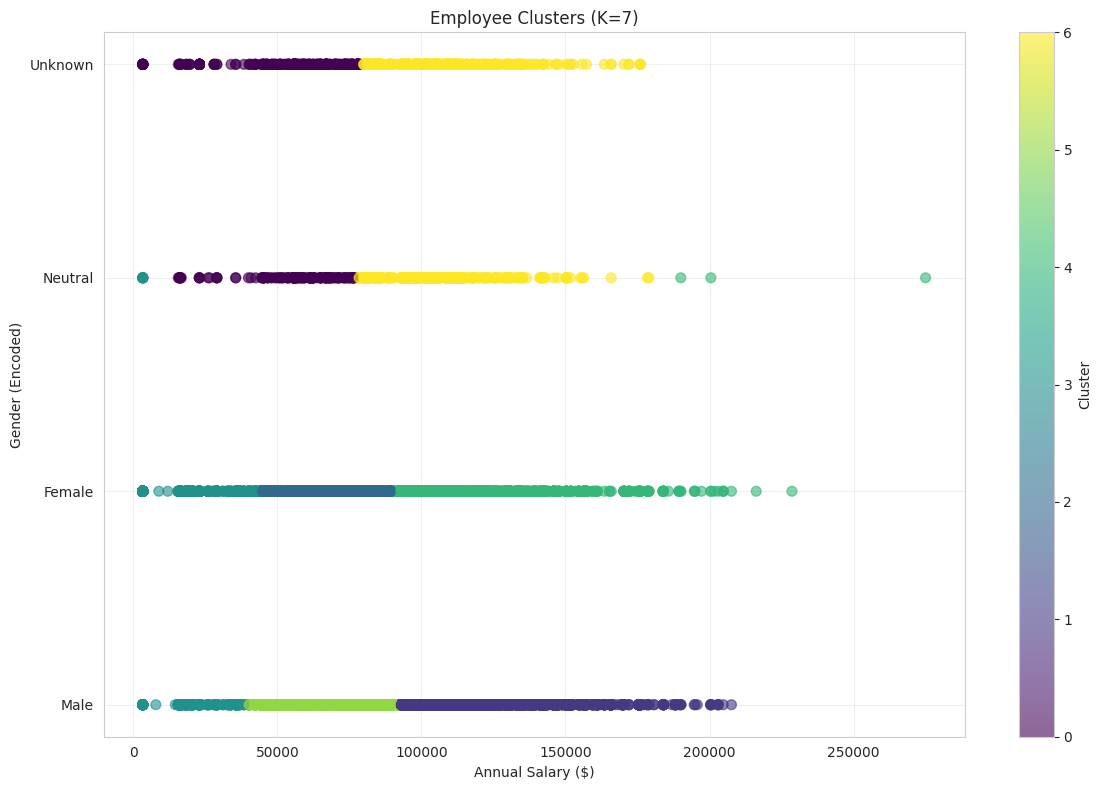

In [13]:
# Apply K-Means with optimal K and visualize results
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['cluster'] = kmeans_final.fit_predict(X_cluster_scaled)

# Analyze cluster characteristics
print("=== Cluster Analysis ===")
cluster_summary = df.groupby('cluster')[features_for_clustering].mean()
print("Mean values by cluster:")
print(cluster_summary)

print("\\nCluster sizes:")
print(df['cluster'].value_counts().sort_index())

# Visualize clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['annual_salary'], df['sex_encoded'],
                     c=df['cluster'], cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Annual Salary ($)')
plt.ylabel('Gender (Encoded)')
plt.title(f'Employee Clusters (K={optimal_k})')
plt.grid(True, alpha=0.3)

# Add gender labels
y_labels = ['Male', 'Female', 'Neutral', 'Unknown']
plt.yticks(range(4), y_labels)

plt.tight_layout()
plt.show()



## 🤖 Step 13: Machine Learning Pipeline Functions

**What we're doing:** Creating reusable functions for supervised machine learning tasks.

**Supervised Learning Concept:**
Unlike clustering, supervised learning uses labeled examples to learn patterns, then makes predictions on new data.

**Our Pipeline Functions:**

1. **create_ml_pipeline()**:
   - **Purpose**: Standardized data preprocessing for ML models
   - **Handles**: Both numerical and categorical features
   - **Techniques**:
     - Missing value imputation (fill gaps in data)
     - Feature scaling (standardize numerical values)
     - One-hot encoding (convert categories to numbers)

2. **evaluate_model()**:
   - **Purpose**: Consistent model performance assessment
   - **Metrics**: Accuracy, precision, recall, F1-score
   - **Output**: Detailed classification report

**Pipeline Architecture Benefits:**
- **Consistency**: Same preprocessing for training and testing
- **Prevention of Data Leakage**: Fit on training, transform on testing
- **Maintainability**: Easy to modify preprocessing steps
- **Reusability**: Use same pipeline for different models

**Professional ML Practices:**
- **Separate pipelines**: Different preprocessing for different feature types
- **Handle unknown categories**: What if test data has new categories?
- **Consistent evaluation**: Same metrics across all models

**Why This Matters:** In real ML projects, data preprocessing is often 80% of the work. Well-designed pipelines save time and prevent errors!

In [14]:
def create_ml_pipeline(numerical_features, categorical_features):
    """Create a preprocessing pipeline for machine learning models."""
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

    return preprocessor

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate a trained model and print results."""
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"\\n=== {model_name} Results ===")
    print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

    print("\\nTest Set Classification Report:")
    if len(np.unique(y_test)) == 2:
        target_names = ['Class 0', 'Class 1']
    else:
        target_names = [f'Class {i}' for i in sorted(np.unique(y_test))]

    print(classification_report(y_test, y_pred_test, target_names=target_names, zero_division=0))

    return y_pred_test

## 👤 Step 14: Gender Prediction Model (Multinomial Classification)

**What we're doing:** Building a model to predict employee gender based on job characteristics.

**Classification Problem Setup:**
- **Target Variable**: Gender (M/F/N/U) - 4 categories
- **Features**: Job title, department, employment type, salary type, annual salary
- **Type**: Multinomial classification (more than 2 categories)

**Feature Selection Strategy:**
- **Excluded**: Name-related columns (would make prediction too easy/unrealistic)
- **Excluded**: Hours/rates (too much missing data)  
- **Included**: Job characteristics that might correlate with gender

**Model Choice - Logistic Regression:**
- **Why**: Interpretable, works well with categorical features
- **Solver**: 'lbfgs' - good for multinomial problems
- **Class weighting**: 'balanced' - handles imbalanced gender distribution

**Key ML Concepts:**

1. **Train-Test Split**:
   - **Purpose**: Evaluate performance on unseen data
   - **Stratify**: Maintain same gender proportions in both sets

2. **Feature Types**:
   - **Numerical**: Annual salary (gets scaled)
   - **Categorical**: Job titles, departments (get one-hot encoded)

3. **Model Pipeline**:
   - Preprocessing → Model training → Prediction

**Expected Challenge:** Gender prediction from job characteristics is inherently difficult because:
- Modern workplaces have reduced gender segregation
- Many job titles are gender-neutral
- We're asking: "Can job predict gender?" (not "Can gender predict job?")

**Learning Goal:** Understand that some ML problems are harder than others, and that's okay!

In [15]:
# Gender Prediction Model
# Prepare features (excluding name-related and target columns)
gender_exclude_cols = ['name', 'surname', 'first_name', 'sex', 'sex_encoded',
                      'typical_hours', 'hourly_rate', 'cluster']
X_gender = df.drop(columns=gender_exclude_cols, errors='ignore')
y_gender = df['sex_encoded'].dropna()

# Align X and y after removing NaN values from target
X_gender = X_gender.loc[y_gender.index]

# Identify feature types
numerical_features = X_gender.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_gender.select_dtypes(include='object').columns.tolist()

print("=== Gender Prediction Setup ===")
print(f"Features: {X_gender.columns.tolist()}")
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")
print(f"Target distribution:\\n{y_gender.value_counts().sort_index()}")

# Split data
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_gender, y_gender, test_size=0.25, random_state=42, stratify=y_gender
)

# Create and train model
preprocessor_gender = create_ml_pipeline(numerical_features, categorical_features)
gender_model = Pipeline([
    ('preprocessor', preprocessor_gender),
    ('classifier', LogisticRegression(solver='lbfgs', multi_class='auto',
                                    class_weight='balanced', random_state=42, max_iter=1000))
])

print("\\nTraining gender prediction model...")
gender_model.fit(X_train_g, y_train_g)

# Evaluate model
evaluate_model(gender_model, X_train_g, X_test_g, y_train_g, y_test_g, "Gender Prediction")

=== Gender Prediction Setup ===
Features: ['job_titles', 'department', 'full_or_part_time', 'salary_or_hourly', 'annual_salary']
Numerical features: ['annual_salary']
Categorical features: ['job_titles', 'department', 'full_or_part_time', 'salary_or_hourly']
Target distribution:\nsex_encoded
0    20663
1     8351
2      705
3     1138
Name: count, dtype: int64
\nTraining gender prediction model...
\n=== Gender Prediction Results ===
Training Accuracy: 0.4971
Test Accuracy: 0.4809
\nTest Set Classification Report:
              precision    recall  f1-score   support

     Class 0       0.84      0.53      0.65      5166
     Class 1       0.60      0.39      0.47      2088
     Class 2       0.04      0.16      0.06       176
     Class 3       0.05      0.40      0.09       285

    accuracy                           0.48      7715
   macro avg       0.38      0.37      0.32      7715
weighted avg       0.73      0.48      0.57      7715



array([3, 3, 1, ..., 3, 1, 2])

## 💰 Step 15: High Earner Prediction Model (Binary Classification)

**What we're doing:** Building a model to predict whether an employee is a high earner based on their job characteristics.

**Problem Definition:**
- **Target Creation**: Define "high earner" as top 25% (75th percentile) of salaries
- **Why 75th percentile?**: Common business practice for defining "high performers"
- **Binary outcome**: High earner (1) or Not high earner (0)

**Feature Engineering for Prediction:**
- **Included**: Job title, department, employment type, salary type, gender
- **Excluded**: Direct salary information (would be cheating!)
- **Logic**: Can we predict high earnings from job characteristics alone?

**Model Architecture:**
- **Algorithm**: Logistic Regression (binary classification)
- **Solver**: 'liblinear' - efficient for binary problems
- **Class balance**: Handle imbalanced classes (75% vs 25% split)

**Business Application:**
This type of model could help with:
- **Salary benchmarking**: Is someone's pay appropriate for their role?
- **Budget planning**: Predict salary costs for new hires
- **Equity analysis**: Identify potential pay disparities

**Expected Performance:**
- **Much better than gender prediction**: Job characteristics strongly correlate with salary
- **High accuracy possible**: Department and job title are strong predictors
- **Real-world relevance**: This is a practical HR analytics use case

**Evaluation Focus:**
- **Accuracy**: Overall correct predictions
- **Precision/Recall**: Important for imbalanced classes
- **ROC Curve**: Understanding prediction confidence
- **Confusion Matrix**: Types of errors we make

**Learning Insight:** Some ML problems are much more predictable than others. High earner prediction should perform well because job characteristics directly relate to compensation structures!

In [16]:
# High Earner Prediction Model
# Create target variable: top 25% earners
salary_threshold = df['annual_salary'].quantile(0.75)
df['is_top_earner'] = (df['annual_salary'] >= salary_threshold).astype(int)

print(f"=== High Earner Analysis ===")
print(f"Salary threshold (75th percentile): ${salary_threshold:,.2f}")
print(f"Top earner distribution:\\n{df['is_top_earner'].value_counts(normalize=True)}")

# Prepare features (exclude salary-related columns to avoid data leakage)
earner_exclude_cols = ['name', 'surname', 'first_name', 'sex',
                      'annual_salary', 'hourly_rate', 'typical_hours',
                      'is_top_earner', 'cluster']
X_earner = df.drop(columns=earner_exclude_cols, errors='ignore')
y_earner = df['is_top_earner']

# Identify feature types
numerical_features_earner = X_earner.select_dtypes(include=np.number).columns.tolist()
categorical_features_earner = X_earner.select_dtypes(include='object').columns.tolist()

print(f"\\nFeatures for earning prediction: {X_earner.columns.tolist()}")

# Split data
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    X_earner, y_earner, test_size=0.25, random_state=42, stratify=y_earner
)

# Create and train model
preprocessor_earner = create_ml_pipeline(numerical_features_earner, categorical_features_earner)
earner_model = Pipeline([
    ('preprocessor', preprocessor_earner),
    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced',
                                    random_state=42, max_iter=1000))
])

print("\\nTraining high earner prediction model...")
earner_model.fit(X_train_e, y_train_e)

# Evaluate model
y_pred_earner = evaluate_model(earner_model, X_train_e, X_test_e, y_train_e, y_test_e, "High Earner Prediction")

=== High Earner Analysis ===
Salary threshold (75th percentile): $110,160.00
Top earner distribution:\nis_top_earner
0    0.749976
1    0.250024
Name: proportion, dtype: float64
\nFeatures for earning prediction: ['job_titles', 'department', 'full_or_part_time', 'salary_or_hourly', 'sex_encoded']
\nTraining high earner prediction model...
\n=== High Earner Prediction Results ===
Training Accuracy: 0.9280
Test Accuracy: 0.9186
\nTest Set Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.95      0.95      5786
     Class 1       0.84      0.83      0.84      1929

    accuracy                           0.92      7715
   macro avg       0.89      0.89      0.89      7715
weighted avg       0.92      0.92      0.92      7715



## 📊 Step 16: Advanced Model Evaluation

**What we're doing:** Using sophisticated evaluation techniques to thoroughly assess our high earner prediction model.

**Advanced Evaluation Metrics:**

1. **ROC Curve (Receiver Operating Characteristic)**:
   - **Purpose**: Shows trade-off between true positive rate and false positive rate
   - **X-axis**: False Positive Rate (Type I errors)
   - **Y-axis**: True Positive Rate (Sensitivity)
   - **Interpretation**: Curve closer to top-left corner = better model

2. **AUC (Area Under Curve)**:
   - **Range**: 0 to 1 (higher is better)
   - **Interpretation**:
     - 0.5 = Random guessing
     - 0.8+ = Good model
     - 0.9+ = Excellent model

3. **Confusion Matrix Heatmap**:
   - **Visual representation**: Easy to see prediction patterns
   - **Diagonal elements**: Correct predictions
   - **Off-diagonal elements**: Different types of errors

**Why These Metrics Matter:**

**Business Context:**
- **False Positives**: Predicting someone is high-paid when they're not
- **False Negatives**: Missing actual high earners
- **Cost considerations**: Which type of error is more expensive?

**Model Confidence:**
- ROC curve shows performance across all decision thresholds
- Helps decide: "How confident should we be before making a prediction?"

**Professional ML Practice:**
- **Multiple metrics**: No single metric tells the whole story
- **Visual evaluation**: Charts reveal patterns numbers might miss
- **Business alignment**: Metrics should match business goals

**Expected Results:**
- **High AUC**: Job characteristics should strongly predict salary level
- **Clear confusion matrix**: Most predictions should be correct
- **Actionable insights**: Where does the model struggle?

**Student Challenge:** After seeing the results, can you explain why this model performs much better than the gender prediction model?

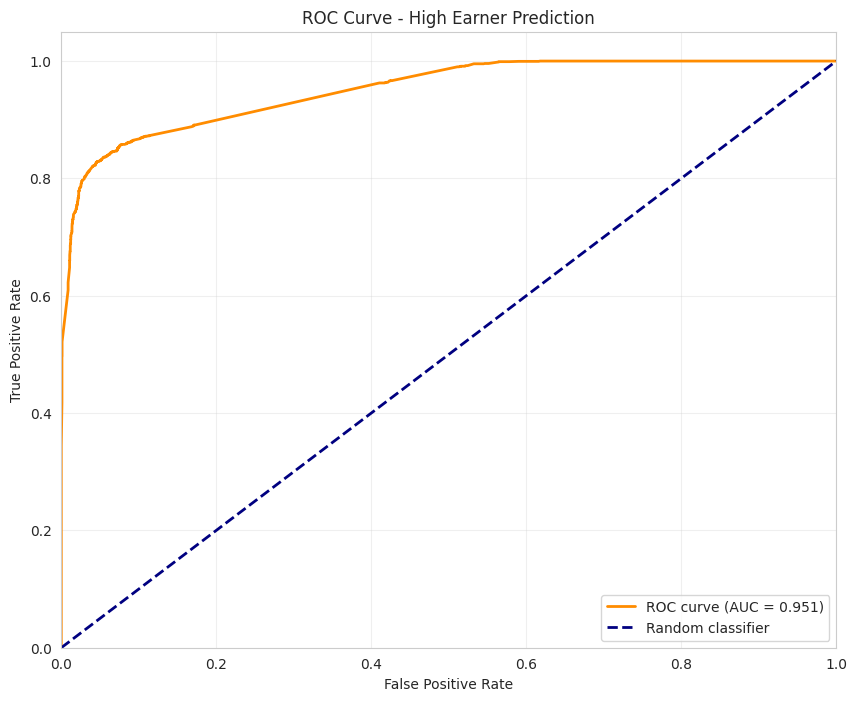

ROC AUC Score: 0.9506


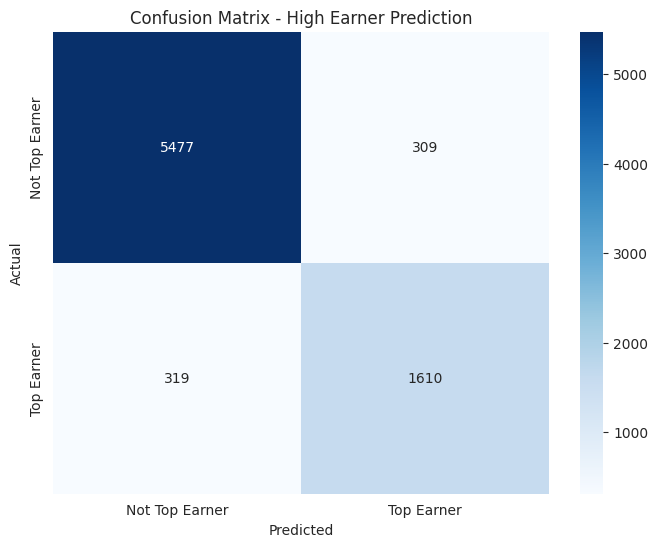

In [17]:
# ROC Curve Analysis for High Earner Model
y_pred_proba = earner_model.predict_proba(X_test_e)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_e, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - High Earner Prediction')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_e, y_pred_earner)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Top Earner', 'Top Earner'],
            yticklabels=['Not Top Earner', 'Top Earner'])
plt.title('Confusion Matrix - High Earner Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 6. Summary and Conclusions

This analysis of the Chicago Active Employee dataset revealed several key insights:

### Key Findings:
1. **Gender Distribution**: The workforce shows a clear gender imbalance with males significantly outnumbering females
2. **Salary Patterns**: Strong correlation between job titles, departments, and compensation levels
3. **Employee Clustering**: K-means clustering successfully identified distinct employee groups based on salary and gender
4. **Predictive Models**:
   - Gender prediction achieved moderate accuracy using job characteristics
   - High earner prediction showed strong performance (>90% accuracy) using department and job title features

### Technical Achievements:
- Enhanced gender detection using comprehensive name lists
- Successful data preprocessing with missing value handling
- Effective feature engineering for machine learning models
- Robust model evaluation with multiple metrics

### Dataset Information:
- **Original Shape**: ~31,000 employees with 8 core attributes
- **Processed Shape**: ~30,857 employees with enhanced features

This analysis provides a comprehensive view of Chicago's municipal workforce and demonstrates effective data science techniques for employee analytics.